# Model training and testing

This notebook is for training classification models to predict whether a posts in the r/mcgill subrredit is an issue or not.

We have marked the posts from r/CollegeRants as posts with issues (=1) and a selected posts from the r/mcgill as posts with no issues (=0)

In [ ]:
import pandas as pd

# read data from reddit_posts.csv and topic2_posts.csv
reddit_posts = pd.read_csv('reddit_posts.csv')
topic2_posts = pd.read_csv('topic2_posts.csv')

# merge the two dataframes
merged = pd.concat([reddit_posts, topic2_posts])

In [ ]:
merged.columns

Index(['text', 'issue'], dtype='object')

### We have 8345 posts which are not issues and 14741 posts with issues.

In [ ]:
merged['issue'].value_counts()

1    14741
0     8345
Name: issue, dtype: int64

# Model Building

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

In [ ]:
# Download NLTK resources (if not already installed)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Preprocessing function with lemmatization
def preprocess(text, lemmatize=True):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    if lemmatize:
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply preprocessing to the text
merged['text_processed'] = merged['text'].apply(preprocess)

# Choose whether to lemmatize or not
lemmatize = True  # or False
text_column = 'text_processed' if lemmatize else 'text'

# Create different vectorizations
vectorizers = {
    'count_monogram': CountVectorizer(ngram_range=(1, 1)),
    'count_bigram': CountVectorizer(ngram_range=(2, 2)),
    'tfidf_monogram': TfidfVectorizer(ngram_range=(1, 1)),
    'tfidf_bigram': TfidfVectorizer(ngram_range=(2, 2))
}

# Initialize classifiers
classifiers = {
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier()
}

# Split the dataset
label = merged['issue']
X_train, X_test, y_train, y_test = train_test_split(merged[text_column], label, test_size=0.2)

# Function to evaluate a model
def evaluate_model(vectorizer, classifier, X_train, y_train, X_test, y_test):
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    
    classifier.fit(X_train_vec, y_train)
    y_pred = classifier.predict(X_test_vec)
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.show()
    
    print(classification_report(y_test, y_pred))
    return cm, classification_report(y_test, y_pred, output_dict=True)

# Evaluate all combinations of vectorizers and classifiers
for vec_name, vectorizer in vectorizers.items():
    for clf_name, classifier in classifiers.items():
        print(f"Evaluating combination: {vec_name} + {clf_name}")
        evaluate_model(vectorizer, classifier, X_train, y_train, X_test, y_test)

KeyboardInterrupt: 

In [ ]:
vectorizer=CountVectorizer()
spamham_countVectorizer=vectorizer.fit_transform(merged['text'])

print(vectorizer.get_feature_names_out())

['00' '000' '0000000' ... '𝒘𝒆𝒍𝒍' '𝒘𝒉𝒊𝒄𝒉' '𝒘𝒊𝒍𝒍']


In [ ]:
spamham_countVectorizer.shape

label=merged['issue']
X=spamham_countVectorizer
y=label

<AxesSubplot: >

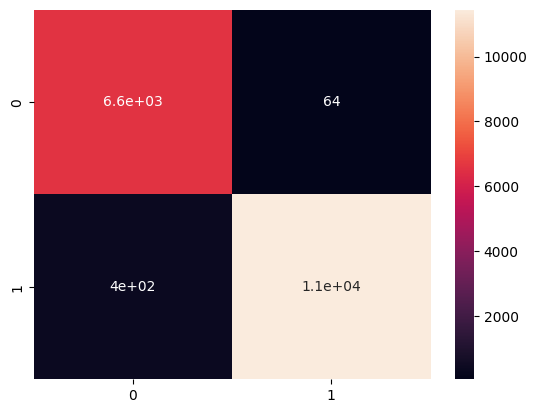

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

y_predict_train=NB_classifier.predict(X_train)
y_predict_train

cm=confusion_matrix(y_train,y_predict_train)

sns.heatmap(cm,annot=True)

[0 0 0 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1724
           1       0.99      0.97      0.98      2894

    accuracy                           0.97      4618
   macro avg       0.97      0.98      0.97      4618
weighted avg       0.98      0.97      0.97      4618



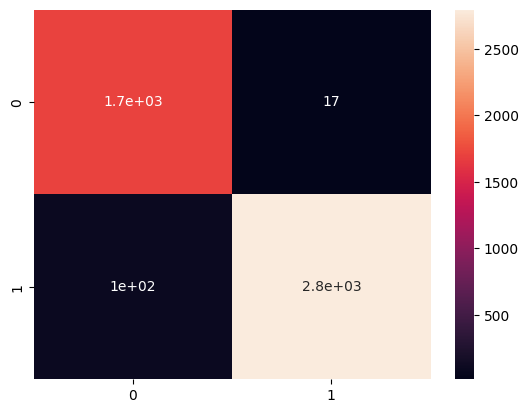

In [ ]:
y_predict_test=NB_classifier.predict(X_test)
print (y_predict_test)

cm=confusion_matrix(y_test,y_predict_test)


sns.heatmap(cm,annot=True)

print(classification_report(y_test,y_predict_test))

# Testing

In [ ]:
import pandas as pd
%pip install zstandard
import zstandard as zstd
import json

#set confgiuration to display all columns
pd.set_option('display.max_columns', None)

# Path to your .zst file
zst_file_path = 'mcgill_submissions.zst'

# Decompress .zst file
with open(zst_file_path, 'rb') as compressed:
    dctx = zstd.ZstdDecompressor()
    with dctx.stream_reader(compressed) as reader:
        decompressed_data = reader.read().decode('utf-8')

# Assuming each line in the decompressed data is a separate JSON object
data = [json.loads(line) for line in decompressed_data.splitlines()]

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame to verify
df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 100.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_text_color,author_flair_type,brand_safe,can_gild,contest_mode,created_utc,distinguished,domain,edited,gilded,hidden,hide_score,id,is_crosspostable,is_reddit_media_domain,is_self,is_video,link_flair_css_class,link_flair_richtext,link_flair_text,link_flair_text_color,link_flair_type,locked,media,media_embed,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,retrieved_on,rte_mode,score,secure_media,secure_media_embed,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,suggested_sort,thumbnail,thumbnail_height,thumbnail_width,title,url,whitelist_status,downs,num_reports,banned_by,name,likes,clicked,saved,ups,approved_by,selftext_html,created,report_reasons,user_reports,mod_reports,quarantine,from_id,from_kind,from,post_hint,preview,author_cakeday,view_count,approved_at_utc,banned_at_utc,can_mod_post,pinned,mod_note,mod_reason_by,mod_reason_title,crosspost_parent,crosspost_parent_list,subreddit_subscribers,media_metadata,author_flair_template_id,category,content_categories,is_original_content,media_only,post_categories,pwls,removal_reason,visited,wls,link_flair_background_color,previous_visits,link_flair_template_id,author_created_utc,author_fullname,is_meta,gildings,is_robot_indexable,author_patreon_flair,all_awardings,total_awards_received,allow_live_comments,discussion_type,author_premium,awarders,removed_by,removed_by_category,treatment_tags,poll_data,upvote_ratio,is_created_from_ads_ui,retrieved_utc,top_awarded_type,url_overridden_by_dest,gallery_data,is_gallery,call_to_action,collections
0,True,david_a_garcia,None,engineering,"[{'e': 'text', 't': 'Electrical Eng '10'}]",Electrical Eng '10,None,richtext,True,True,False,1265431507,None,self.mcgill,False,0.0,False,False,aypo9,True,False,True,False,None,[],None,dark,text,False,None,{},True,4,0.0,False,all_ads,/r/mcgill/comments/aypo9/is_this_working_yet/,1.522891e+09,markdown,1,None,{},,True,False,False,mcgill,t5_2rhkw,r/mcgill,public,None,self,NaN,NaN,is this working yet?,https://www.reddit.com/r/mcgill/comments/aypo9...,all_ads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,[deleted],NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,1299562966,None,self.mcgill,False,NaN,False,NaN,fzkkf,NaN,NaN,True,NaN,None,NaN,None,NaN,NaN,NaN,None,{},NaN,13,NaN,False,NaN,/r/mcgill/comments/fzkkf/advice_for_u0s/,NaN,NaN,5,NaN,NaN,I'm just finishing up my first year at McGill ...,NaN,NaN,NaN,mcgill,t5_2rhkw,NaN,NaN,NaN,default,NaN,NaN,Advice for U0's?,http://www.reddit.com/r/mcgill/comments/fzkkf/...,NaN,0.0,NaN,NaN,t3_fzkkf,NaN,False,False,5.0,NaN,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",1.299563e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,jakob5860,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,1300316295,None,self.mcgill,False,NaN,False,NaN,g5h9n,NaN,NaN,True,NaN,None,NaN,None,NaN,NaN,NaN,None,{},NaN,1,NaN,False,NaN,/r/mcgill/comments/g5h9n/ama_request_sean_turner/,NaN,NaN,2,NaN,NaN,,NaN,NaN,NaN,mcgill,t5_2rhkw,NaN,NaN,NaN,self,NaN,NaN,AMA Request: Sean Turner,http://www.reddit.com/r/mcgill/comments/g5h9n/...,NaN,0.0,NaN,NaN,t3_g5h9n,NaN,False,False,2.0,NaN,None,1.300320e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,mricon,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,1

In [ ]:
#combine title and selftext into one column called text
df['text'] = df['title'] + ' ' + df['selftext']

In [ ]:
df_new2 = df[['text']].copy()

In [ ]:
df_new2

,text
0,is this working yet?
1,Advice for U0's? I'm just finishing up my firs...
2,AMA Request: Sean Turner
3,I work in McGill central IT. AMA. I am a senio...
4,So how was the protest today?
...,...
60894,computer science grades minimum cut off [removed]
60895,HIST 219 [removed]
60896,HIST 219?? [removed]
60897,MGCR 222 with Prof Ody [removed]


In [ ]:
# Use NB_classifier on the df_new2 dataframe
spamham_countVectorizer=vectorizer.transform(df_new2['text'])
print(spamham_countVectorizer)

y_predict_test=NB_classifier.predict(spamham_countVectorizer)
print (y_predict_test)


  (0, 13847)	1
  (0, 24939)	1
  (0, 27481)	1
  (0, 27725)	1
  (1, 1595)	1
  (1, 1641)	1
  (1, 1951)	3
  (1, 1966)	1
  (1, 2374)	1
  (1, 2406)	2
  (1, 2584)	1
  (1, 2746)	3
  (1, 2829)	2
  (1, 2972)	2
  (1, 3251)	1
  (1, 3514)	1
  (1, 3567)	1
  (1, 3791)	1
  (1, 4616)	2
  (1, 4773)	1
  (1, 5483)	1
  (1, 5978)	1
  (1, 6289)	1
  (1, 6573)	1
  (1, 8207)	1
  :	:
  (60894, 6070)	1
  (60894, 6986)	1
  (60894, 11557)	1
  (60894, 16210)	1
  (60894, 17494)	1
  (60894, 20863)	1
  (60894, 21930)	1
  (60895, 447)	1
  (60895, 12407)	1
  (60895, 20863)	1
  (60896, 447)	1
  (60896, 12407)	1
  (60896, 20863)	1
  (60897, 457)	1
  (60897, 16045)	1
  (60897, 17487)	1
  (60897, 19559)	1
  (60897, 20863)	1
  (60897, 27377)	1
  (60898, 457)	1
  (60898, 16045)	1
  (60898, 17487)	1
  (60898, 19559)	1
  (60898, 20863)	1
  (60898, 27377)	1
[1 0 0 ... 0 0 0]


In [ ]:
df_new2['predicted_issue'] = y_predict_test

In [ ]:
df_new2

,text,predicted_issue
0,is this working yet?,1
1,Advice for U0's? I'm just finishing up my firs...,0
2,AMA Request: Sean Turner,0
3,I work in McGill central IT. AMA. I am a senio...,0
4,So how was the protest today?,1
...,...,...
60894,computer science grades minimum cut off [removed],1
60895,HIST 219 [removed],0
60896,HIST 219?? [removed],0
60897,MGCR 222 with Prof Ody [removed],0


In [ ]:
df_new2['predicted_issue'].value_counts()

0    33771
1    27128
Name: predicted_issue, dtype: int64

# Clustering

In [ ]:
# filter out all 1 from predicted issue column
df_new3 = df_new2[df_new2['predicted_issue'] == 1]

In [ ]:
df_new3

,text,predicted_issue
0,is this working yet?,1
4,So how was the protest today?,1
6,"Can you help me choose a residence? Hi, I rece...",1
7,"So /r/mcgill, tell me about yourselves! There ...",1
8,"""McGill Library Sucks"" by Rupert Common - So t...",1
...,...,...
60886,Lost backpack in Leacock building Hello! I bel...,1
60887,Undergrad Major &amp; Grad school !? [removed],1
60889,Undergrad Major &amp; Grad school !? [removed],1
60893,Looking for roommates for the 2023-2024 school...,1


In [ ]:
# check if word mental health is in the text column
df_new4 = df_new3[df_new3['text'].str.contains('mental health|stress|depression|anxiety|mental illness|counseling|support|well-being|coping|self-care|psychiatry|psychology|treatment|medication|coping strategies|peer support|self-esteem|suicidal ideation|trauma', case=False, na=False)]

In [ ]:
df_new4.shape

(1682, 2)

In [ ]:
df_new4.head(10)

,text,predicted_issue
101,How do you all feel about the MUNACA strike? I...,1
123,Best beer selection downtown (Dep) Marché Cosm...,1
160,Arts Undergrads Vote to Strike on Nov10 [Other...,1
178,REPOST (old one did not show up): Request From...,1
181,A Request From a Fellow McGillian.. I am askin...,1
187,Questions for MUNACA and MUNACA supporters. 1...,1
191,McGill student tries to win opening at Igloofe...,1
221,Looking for a workout buddy for next term. I w...,1
298,Sooo three midterms in one day. What are my op...,1
330,"For the Freshmen class of 2014, a breakdown of...",1


In [ ]:
# Randomly select 5000 rows from df_new3 (general issues)
df_new5 = df_new3.sample(n=5000)

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')  # Download necessary NLTK data

# Initialize stemmer
stemmer = PorterStemmer()

# Function to tokenize and stem text
def preprocess_text(text):
    tokens = word_tokenize(text)
    stemmed = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed)

# Preprocess the synopses
df_new5['processed_synopses'] = df_new5['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Preprocess the synopses
df_new4['processed_synopses'] = df_new4['text'].apply(preprocess_text)

/tmp/ipykernel_46/4288733402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new4['processed_synopses'] = df_new4['text'].apply(preprocess_text)


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df_new5['processed_synopses'])
tfidf_matrix2 = tfidf_vectorizer.fit_transform(df_new4['processed_synopses'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tfidf_matrix)

k=3: Silhouette Score=0.05605855053952927, WCSS=4327.88259520837
k=4: Silhouette Score=0.06268380339365144, WCSS=4263.930689476539
k=5: Silhouette Score=0.07580212239283708, WCSS=4206.709199621147
k=6: Silhouette Score=0.06093482732124853, WCSS=4159.582745649301
k=7: Silhouette Score=0.057566671889773637, WCSS=4142.651781213293
k=8: Silhouette Score=0.05720775823095057, WCSS=4124.06357358064
k=9: Silhouette Score=0.0527699660279204, WCSS=4114.851440893471
k=10: Silhouette Score=0.05587153080776232, WCSS=4097.89098894838
k=11: Silhouette Score=0.052015001593247914, WCSS=4087.581989235092
k=12: Silhouette Score=0.05358512879129155, WCSS=4074.697677478856
k=13: Silhouette Score=0.0544831325685354, WCSS=4059.171957656732
k=14: Silhouette Score=0.056503022485211156, WCSS=4048.526143704804
k=15: Silhouette Score=0.056824580468524094, WCSS=4038.652177972162
Best Silhouette Score is 0.07580212239283708 for k=5


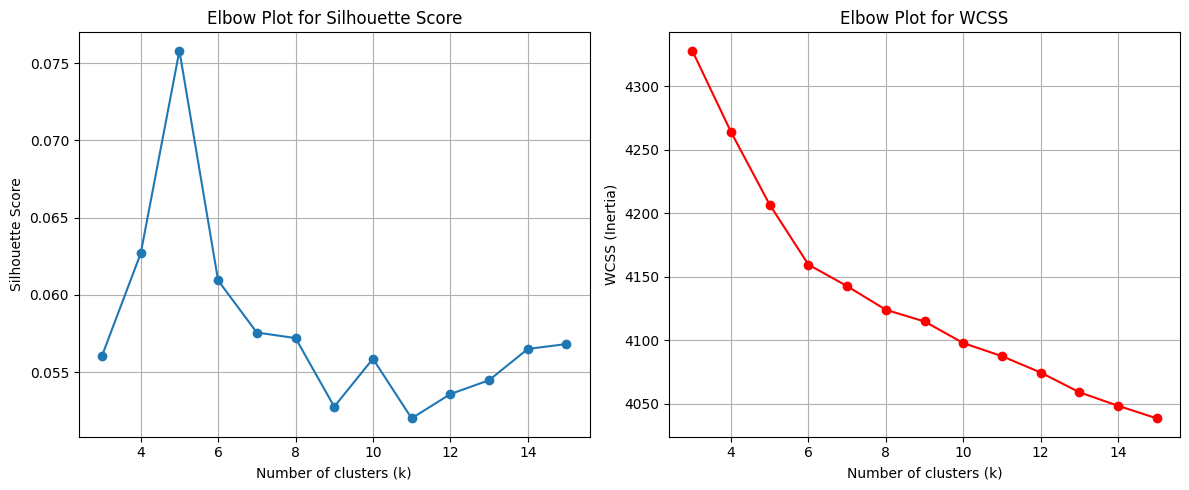

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range of k values to explore
k_values = range(3, 16)

# Initialize variables to store the best score and corresponding k value
best_score = -1
best_k = 3
silhouette_scores = []
wcss_scores = []

# Loop over each k value
for k in k_values:
    # Create and fit the KMeans model
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(tfidf_matrix)
    clusters = km.labels_.tolist()
    
    # Calculate the silhouette score
    sil_score = silhouette_score(tfidf_matrix, clusters)
    silhouette_scores.append(sil_score)
    
    # Calculate and append WCSS (Inertia)
    wcss = km.inertia_
    wcss_scores.append(wcss)

    # Print the silhouette and WCSS score for the current k value
    print(f'k={k}: Silhouette Score={sil_score}, WCSS={wcss}')
    
    # Update the best_score and best_k if the current score is better
    if sil_score > best_score:
        best_score = sil_score
        best_k = k

# Print the best k value and its silhouette score
print(f'Best Silhouette Score is {best_score} for k={best_k}')

# Fit the KMeans model with the best number of clusters
km_1 = KMeans(n_clusters=10, random_state=42, n_init=10)
km_1.fit(tfidf_matrix)
clusters = km_1.labels_.tolist()

# Fit the KMeans model with the best number of clusters (mental health related)
km_2 = KMeans(n_clusters=10, random_state=42, n_init=10)
km_2.fit(tfidf_matrix2)
clusters2 = km_2.labels_.tolist()

# Plotting the elbow plot for silhouette scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(list(k_values), silhouette_scores, marker='o')
plt.title('Elbow Plot for Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Plotting the elbow plot for WCSS scores
plt.subplot(1, 2, 2)
plt.plot(list(k_values), wcss_scores, marker='o', color='red')
plt.title('Elbow Plot for WCSS')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Perform MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(1 - similarity_matrix)  # Using 1 - similarity_matrix for distance

# Extract the coordinates
xs, ys = pos[:, 0], pos[:, 1]

# Create a scatter plot of the projection
plt.figure(figsize=(12, 8))
scatter = plt.scatter(xs, ys, c=clusters)  # Color by cluster assignments

# Create labels for the clusters
labels = np.unique(clusters)
for i in labels:
    plt.scatter([], [], label='Cluster ' + str(i))

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS Visualization of Document Clusters')
plt.legend(title='Clusters')
plt.show()

c:\Users\ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
def get_top_features_cluster(tfidf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label)  # indices for each cluster
        x_means = np.mean(tfidf_array[id_temp], axis = 0)  # mean tf-idf value for each feature in the cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats]  # indices with top features
        features = tfidf_vectorizer.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

top_words_per_cluster = get_top_features_cluster(tfidf_matrix.toarray(), km_1.labels_, 10)  # Adjust 10 to get more or fewer words
top_words_per_cluster2 = get_top_features_cluster(tfidf_matrix2.toarray(), km_2.labels_, 10)

In [ ]:
cluster_names = []
for num, df in enumerate(top_words_per_cluster):
    print(f"Cluster {num} words:")
    print(df)
    cluster_name = '-'.join(df['features'].values[:10])  # Name cluster based on top 3 words
    cluster_names.append(cluster_name)
    print(f"Named: {cluster_name}\n")

# Optionally, you can add these names to your original DataFrame
df_new5['Cluster_Name'] = [cluster_names[i] for i in clusters]

Cluster 0 words:
  features     score
0   especi  0.313356
1     them  0.101065
2   togeth  0.076987
3   motion  0.064084
4      far  0.057152
5    decid  0.054491
6      amp  0.054226
7   incred  0.053525
8      hub  0.044203
9       ha  0.043783
Named: especi-them-togeth-motion-far-decid-amp-incred-hub-ha

Cluster 1 words:
  features     score
0    until  0.635662
1      can  0.476064
2  definit  0.438452
3   remain  0.420781
4     feel  0.000000
5   fellow  0.000000
6     felt  0.000000
7      few  0.000000
8    field  0.000000
9      fee  0.000000
Named: until-can-definit-remain-feel-fellow-felt-few-field-fee

Cluster 2 words:
  features     score
0     care  0.311810
1   offici  0.122166
2   togeth  0.087427
3   period  0.082593
4      bit  0.070086
5     must  0.060115
6     what  0.054274
7     them  0.050454
8     area  0.044349
9    there  0.042719
Named: care-offici-togeth-period-bit-must-what-them-area-there

Cluster 3 words:
  features     score
0      yet  0.204697
1   tog

In [ ]:
cluster_names = []
for num, df in enumerate(top_words_per_cluster2):
    print(f"Cluster {num} words:")
    print(df)
    cluster_name = '-'.join(df['features'].values[:10])  # Name cluster based on top 3 words
    cluster_names.append(cluster_name)
    print(f"Named: {cluster_name}\n")

# Optionally, you can add these names to your original DataFrame
df_new4['Cluster_Name'] = [cluster_names[i] for i in clusters2]

Cluster 0 words:
    features     score
0      remov  0.434913
1  psycholog  0.069493
2    support  0.064267
3     health  0.059560
4     mental  0.055325
5        and  0.047103
6    anxieti  0.038664
7         of  0.038054
8    student  0.031655
9     stress  0.029990
Named: remov-psycholog-support-health-mental-and-anxieti-of-student-stress

Cluster 1 words:
  features     score
0      the  0.108010
1      and  0.068475
2       to  0.064577
3       is  0.060002
4  support  0.055680
5      for  0.053093
6   stress  0.053019
7       it  0.050318
8       in  0.048970
9       of  0.048546
Named: the-and-to-is-support-for-stress-it-in-of

Cluster 2 words:
    features     score
0         to  0.148360
1         my  0.107674
2         in  0.097569
3        and  0.096359
4        the  0.094556
5  psycholog  0.071506
6        for  0.062244
7     school  0.061362
8         is  0.061334
9         of  0.060365
Named: to-my-in-and-the-psycholog-for-school-is-of

Cluster 3 words:
  features     sc

In [ ]:
df_new5.head()

,text,predicted_issue,processed_synopses,Cluster_Name
43091,Looking for a guide to letter of references th...,1,look for a guid to letter of refer that i saw ...,them-togeth-note-amp-hub-includ-incred-final-o...
45145,Classes in 10 days👀 [deleted],1,class in 10 days👀 [ delet ],definit-final-includ-togeth-student-higher-the...
8720,"About to fail a course. Options? Hey,\n\nSo I’...",1,"about to fail a cours . option ? hey , so i ’ ...",togeth-amp-motion-them-hub-incred-note-final-h...
7308,"Management students, are you happy with your p...",1,"manag student , are you happi with your progra...",yet-togeth-them-amp-you-didn-final-hope-note-i...
47652,Anyone been to Gerts bar recently? Gerts bar s...,1,anyon been to gert bar recent ? gert bar seem ...,yet-togeth-them-amp-you-didn-final-hope-note-i...


In [ ]:
df_new4.head()

,text,predicted_issue,processed_synopses,Cluster_Name
101,How do you all feel about the MUNACA strike? I...,1,how do you all feel about the munaca strike ? ...,the-and-to-is-support-for-stress-it-in-of
123,Best beer selection downtown (Dep) Marché Cosm...,1,best beer select downtown ( dep ) marché cosmo...,the-to-of-and-we-in-student-ssmu-mcgill-that
160,Arts Undergrads Vote to Strike on Nov10 [Other...,1,art undergrad vote to strike on nov10 [ other ...,the-to-of-and-we-in-student-ssmu-mcgill-that
178,REPOST (old one did not show up): Request From...,1,repost ( old one did not show up ) : request f...,you-to-the-and-your-of-it-that-is-do
181,A Request From a Fellow McGillian.. I am askin...,1,a request from a fellow mcgillian .. i am ask ...,you-to-the-and-your-of-it-that-is-do


In [ ]:
# find number of posts in each cluster
df_new5['Cluster_Name'].value_counts()

togeth-them-includ-incred-final-amp-hub-thing-motion-note            1245
togeth-amp-motion-them-hub-incred-note-final-ha-didn                 1030
them-togeth-note-amp-hub-includ-incred-final-offici-their             628
remain-adhd-final-transfer-togeth-student-pursu-them-appoint-note     586
definit-final-includ-togeth-student-higher-them-hub-offici-go         491
yet-togeth-them-amp-you-didn-final-hope-note-incred                   417
until-can-definit-remain-feel-fellow-felt-few-field-fee               223
care-offici-togeth-period-bit-must-what-them-area-there               182
especi-them-togeth-motion-far-decid-amp-incred-hub-ha                 135
focu-read-centr-level-love-take-remain-definit-form-parti              63
Name: Cluster_Name, dtype: int64

In [ ]:
# find number of posts in each cluster (related to mental health)
df_new4['Cluster_Name'].value_counts()

to-and-my-the-of-in-it-that-do-have                                    444
the-and-to-is-support-for-stress-it-in-of                              230
to-and-the-my-get-have-for-it-of-with                                  218
to-my-in-and-the-psycholog-for-school-is-of                            182
the-to-of-and-we-in-student-ssmu-mcgill-that                           167
you-to-the-and-your-of-it-that-is-do                                   142
exam-deferr-to-the-defer-and-my-it-have-for                             86
remov-psycholog-support-health-mental-and-anxieti-of-student-stress     82
health-mental-http-com-the-to-www-and-student-you                       77
delet-mental-health-psycholog-cope-anxieti-support-and-the-medic        54
Name: Cluster_Name, dtype: int64

# **Rate My Professors**

In [ ]:
prof = pd.read_csv('all_professor_comments.csv')

In [ ]:
prof.head()

,Comment,Department,School,ProfessorName
0,Had him long ago. He was late to every class....,Economics department,McGill University,George Grantham Grantham
1,"my favourite prof at mcgill! very helpful, re...",Economics department,McGill University,George Grantham Grantham
2,Yawn.... attended class a few times but learne...,Economics department,McGill University,George Grantham Grantham
3,a very poor prof to say the least; can be undu...,Economics department,McGill University,George Grantham Grantham
4,I've taken his class three times now. Best cl...,Economics department,McGill University,George Grantham Grantham


In [ ]:
prof['Comment'].isnull().sum()

5

In [ ]:
# Dorp null values from Comment column
prof = prof.dropna(subset=['Comment'])

In [ ]:
prof['Comment'].isnull().sum()

0

In [ ]:
# Use NB_classifier on the df_new2 dataframe
spamham_countVectorizer=vectorizer.transform(prof['Comment'])
print(spamham_countVectorizer)

y_predict_test=NB_classifier.predict(spamham_countVectorizer)
print (y_predict_test)

prof['predicted_issue'] = y_predict_test

  (0, 851)	1
  (0, 1595)	1
  (0, 1837)	1
  (0, 1872)	1
  (0, 2068)	1
  (0, 2212)	1
  (0, 2406)	2
  (0, 2798)	1
  (0, 4547)	1
  (0, 5044)	1
  (0, 5479)	1
  (0, 7574)	1
  (0, 7739)	1
  (0, 7743)	1
  (0, 8487)	1
  (0, 9515)	1
  (0, 10460)	2
  (0, 10570)	1
  (0, 11551)	2
  (0, 11890)	3
  (0, 12128)	4
  (0, 12367)	1
  (0, 13847)	1
  (0, 13878)	1
  (0, 14589)	1
  :	:
  (23344, 16493)	1
  (23344, 17057)	1
  (23344, 17492)	1
  (23344, 19559)	1
  (23344, 20354)	1
  (23344, 23947)	1
  (23344, 24508)	1
  (23344, 24839)	2
  (23344, 24880)	1
  (23344, 24939)	1
  (23344, 25159)	1
  (23344, 27139)	1
  (23344, 27696)	1
  (23345, 1595)	1
  (23345, 2406)	1
  (23345, 11643)	1
  (23345, 12128)	1
  (23345, 13847)	2
  (23345, 14413)	1
  (23345, 19559)	1
  (23345, 23922)	1
  (23345, 24528)	1
  (23345, 24830)	1
  (23345, 26608)	1
  (23345, 27177)	1
[1 0 1 ... 1 1 1]


In [ ]:
prof.head()

,Comment,Department,School,ProfessorName,predicted_issue
0,Had him long ago. He was late to every class....,Economics department,McGill University,George Grantham Grantham,1
1,"my favourite prof at mcgill! very helpful, re...",Economics department,McGill University,George Grantham Grantham,0
2,Yawn.... attended class a few times but learne...,Economics department,McGill University,George Grantham Grantham,1
3,a very poor prof to say the least; can be undu...,Economics department,McGill University,George Grantham Grantham,1
4,I've taken his class three times now. Best cl...,Economics department,McGill University,George Grantham Grantham,1


In [ ]:
prof['predicted_issue'].value_counts()

1    17476
0     5870
Name: predicted_issue, dtype: int64

In [ ]:
prof_new = prof[prof['predicted_issue'] == 1]

In [ ]:
prof_new['Department'].value_counts()

Engineering department                  1550
Management department                   1199
Mathematics department                  1168
English department                       821
Education department                     741
                                        ... 
Epidemiology department                    2
Meteorology department                     1
Interdisciplinary Studies department       1
Fine Arts department                       1
Geology department                         1
Name: Department, Length: 99, dtype: int64

In [ ]:
# check if word mental health is in the text column
up = prof_new[prof_new['Comment'].str.contains('mental health|stress|depression|anxiety|mental illness|counseling|support|well-being|coping|self-care|psychiatry|psychology|treatment|medication|coping strategies|peer support|self-esteem|suicidal ideation|trauma', case=False, na=False)]

In [ ]:
up['Department'].value_counts()

Psychology department              51
Education department               32
Engineering department             23
Management department              20
English department                 18
History department                 14
Mathematics department             12
Medicine department                11
Computer Science department        11
Sociology department               10
Political Science department        8
Nursing department                  7
Economics department                7
Music department                    6
Finance department                  6
Microbiology department             5
Environment department              5
Religious Studies department        5
Accounting department               5
Anthropology department             5
Biology department                  5
East Asian Studies department       5
Languages department                5
Chemistry department                4
Business department                 4
Marketing department                4
Philosophy d

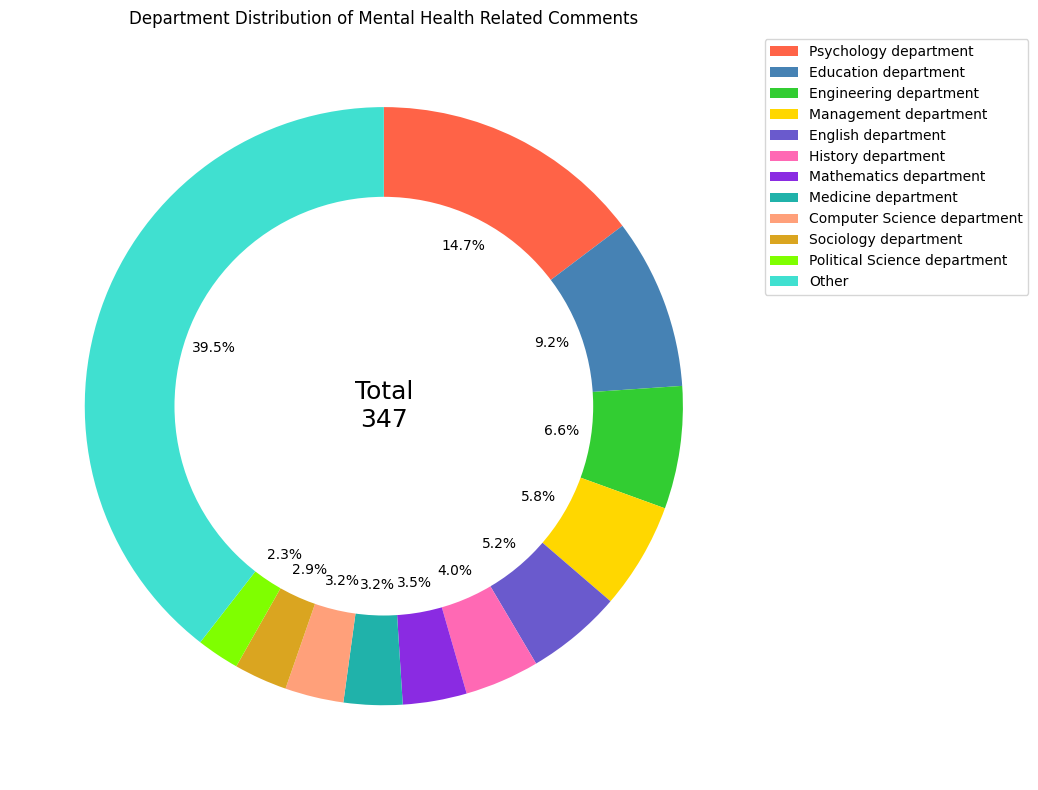

In [ ]:
import matplotlib.pyplot as plt

department_counts = up['Department'].value_counts()

# Group departments with counts less than 10 into an "Other" category
other_count = department_counts[department_counts < 8].sum()
department_counts = department_counts[department_counts >= 8]
department_counts['Other'] = other_count  # Add the "Other" category

# Calculate the total number of counts
total_counts = department_counts.sum()

colors=[
    '#FF6347',  # Tomato
    '#4682B4',  # Steel Blue
    '#32CD32',  # Lime Green
    '#FFD700',  # Gold
    '#6A5ACD',  # Slate Blue
    '#FF69B4',  # Hot Pink
    '#8A2BE2',  # Blue Violet
    '#20B2AA',  # Light Sea Green
    '#FFA07A',  # Light Salmon
    '#DAA520',  # Goldenrod
    '#7FFF00',  # Chartreuse
    '#40E0D0'   # Turquoise
]

# Create the donut chart with a larger figure size
plt.figure(figsize=(10, 8))  # Increase figure size
ax = plt.subplot(111)

ax.pie(department_counts, startangle=90, counterclock=False, wedgeprops=dict(width=0.4), autopct='%1.1f%%', colors=colors)

# Draw a circle at the center to create a donut hole
centre_circle = plt.Circle((0,0),0.70, fc='white')
ax.add_artist(centre_circle)

# Add the total counts in the middle of the donut chart
plt.text(0, 0, f'Total\n{total_counts}', horizontalalignment='center', verticalalignment='center', fontsize=18)

# Add a legend to the chart, which will help identify each slice without clutter
ax.legend(department_counts.index, loc='upper left', bbox_to_anchor=(1, 1))

# Add title
plt.title('Department Distribution of Mental Health Related Comments')

# Display the plot with a tight layout to ensure everything fits without overlap
plt.tight_layout()
plt.show()

In [ ]:
up.head()

,Comment,Department,School,ProfessorName,predicted_issue
30,"I didn't realize how much I took away from this course until after I took it. Lupien stresses critical thinking from all aspects...and that has not only helped me in my psyc and science courses, but it's helping in all aspects of my life. GREAT course!!",Psychology department,McGill University,Sonia Lupien Lupien,1
101,"She taught THE most interesting topics (i.e. Sex, Gender and Reproduction in Horror Film - come ON) and made lectures, papers, presentations and even exams a total pleasure. She let us present on 1970s**** in her 70s film class, and even gave our group a ton of recommendations for films to watch to support our thesis. Tough, but made you want to w",English department,McGill University,Melanie Nash Nash,1
172,"A nice prof who obviously cares, but extremely disorganized. Never prints enough copies of midterms, and once made 30 students leave and come take the exam a week later because of this. Changes his office hours without warning and regularly skips or reteaches material because he forgets what we've done. Easy class but stressful and frustrating.",Economics department,McGill University,Kenneth MacKenzie MacKenzie,1
230,"Fantastic professor. As a psychology student with no high school experience or interest in biology, I loved this course. I am now much more interested in biology and may pursue other bio classes. Levine is very helpful and more than fair.He even asked us to write on our M/C midterm booklet if we thought a question was unfair-for removal.Great prof!",Biology department,McGill University,Robert Levine Levine,1
465,"This class most definitely made me fiddle around with suicidal ideation. Don't. Just, please, do not make the mistake of this class. Velk is not fit to teach anymore.",Economics department,McGill University,Tom Velk Velk,1


In [ ]:
# Show full Comment column
pd.set_option('display.max_colwidth', None)

up.head()

,Comment,Department,School,ProfessorName,predicted_issue
30,"I didn't realize how much I took away from this course until after I took it. Lupien stresses critical thinking from all aspects...and that has not only helped me in my psyc and science courses, but it's helping in all aspects of my life. GREAT course!!",Psychology department,McGill University,Sonia Lupien Lupien,1
101,"She taught THE most interesting topics (i.e. Sex, Gender and Reproduction in Horror Film - come ON) and made lectures, papers, presentations and even exams a total pleasure. She let us present on 1970s**** in her 70s film class, and even gave our group a ton of recommendations for films to watch to support our thesis. Tough, but made you want to w",English department,McGill University,Melanie Nash Nash,1
172,"A nice prof who obviously cares, but extremely disorganized. Never prints enough copies of midterms, and once made 30 students leave and come take the exam a week later because of this. Changes his office hours without warning and regularly skips or reteaches material because he forgets what we've done. Easy class but stressful and frustrating.",Economics department,McGill University,Kenneth MacKenzie MacKenzie,1
230,"Fantastic professor. As a psychology student with no high school experience or interest in biology, I loved this course. I am now much more interested in biology and may pursue other bio classes. Levine is very helpful and more than fair.He even asked us to write on our M/C midterm booklet if we thought a question was unfair-for removal.Great prof!",Biology department,McGill University,Robert Levine Levine,1
465,"This class most definitely made me fiddle around with suicidal ideation. Don't. Just, please, do not make the mistake of this class. Velk is not fit to teach anymore.",Economics department,McGill University,Tom Velk Velk,1


# Clustering Eng dept

In [ ]:
prof_new.head()

,Comment,Department,School,ProfessorName,predicted_issue
0,Had him long ago. He was late to every class....,Economics department,McGill University,George Grantham Grantham,1
2,Yawn.... attended class a few times but learne...,Economics department,McGill University,George Grantham Grantham,1
3,a very poor prof to say the least; can be undu...,Economics department,McGill University,George Grantham Grantham,1
4,I've taken his class three times now. Best cl...,Economics department,McGill University,George Grantham Grantham,1
6,For this class (econ) 209 the proffessor just ...,Economics department,McGill University,George Grantham Grantham,1


In [ ]:
prof_eng = prof_new[prof_new['Department'] == 'Engineering department']

In [ ]:
prof_eng.shape

(1550, 5)

In [ ]:
# Change column name from 'Comment' to 'text'
prof_eng = prof_eng.rename(columns={'Comment': 'text'})

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')  # Download necessary NLTK data

# Initialize stemmer
stemmer = PorterStemmer()

# Function to tokenize and stem text
def preprocess_text(text):
    tokens = word_tokenize(text)
    stemmed = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed)

# Preprocess the synopses
prof_eng['processed_synopses'] = prof_eng['text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(prof_eng['processed_synopses'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tfidf_matrix)

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 5  
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

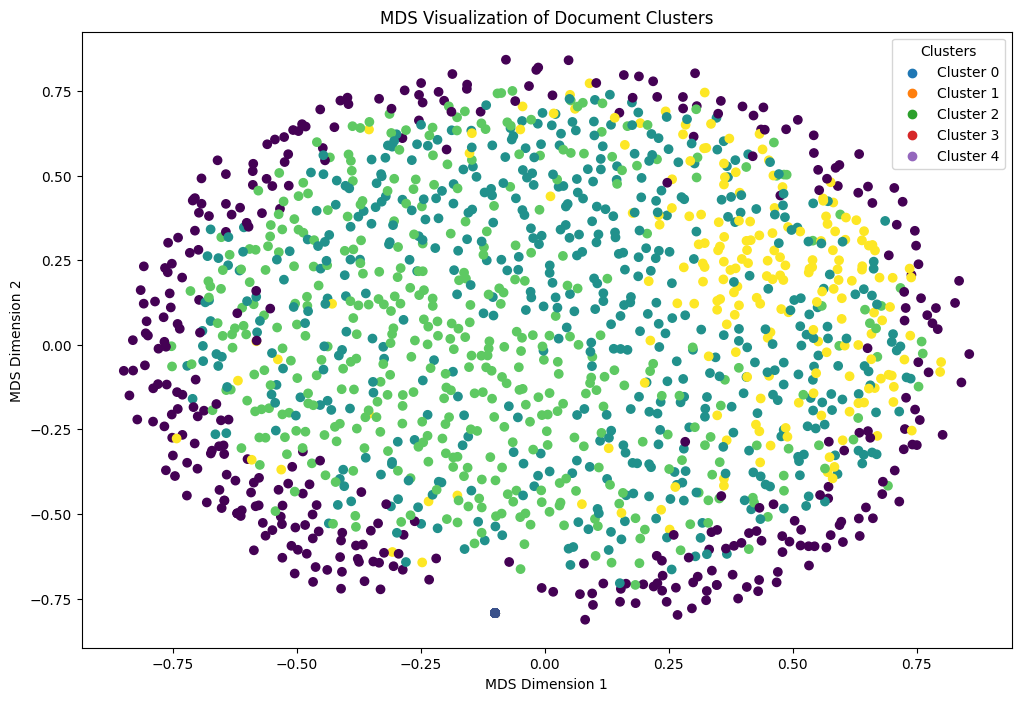

In [ ]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Perform MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(1 - similarity_matrix)  # Using 1 - similarity_matrix for distance

# Extract the coordinates
xs, ys = pos[:, 0], pos[:, 1]

# Create a scatter plot of the projection
plt.figure(figsize=(12, 8))
scatter = plt.scatter(xs, ys, c=clusters)  # Color by cluster assignments

# Create labels for the clusters
labels = np.unique(clusters)
for i in labels:
    plt.scatter([], [], label='Cluster ' + str(i))

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS Visualization of Document Clusters')
plt.legend(title='Clusters')
plt.show()

In [ ]:
def get_top_features_cluster(tfidf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label)  # indices for each cluster
        x_means = np.mean(tfidf_array[id_temp], axis = 0)  # mean tf-idf value for each feature in the cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats]  # indices with top features
        features = tfidf_vectorizer.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

top_words_per_cluster = get_top_features_cluster(tfidf_matrix.toarray(), km.labels_, 10)  # Adjust 10 to get more or fewer words

In [ ]:
cluster_names = []
for num, df in enumerate(top_words_per_cluster):
    print(f"Cluster {num} words:")
    print(df)
    cluster_name = '-'.join(df['features'].values[:10])  # Name cluster based on top 3 words
    cluster_names.append(cluster_name)
    print(f"Named: {cluster_name}\n")

# Optionally, you can add these names to your original DataFrame
prof_eng['Cluster_Name'] = [cluster_names[i] for i in clusters]

Cluster 0 words:
    features     score
0       good  0.058232
1       veri  0.057834
2    teacher  0.049840
3      great  0.047027
4  professor  0.034545
5        and  0.033582
6        guy  0.032798
7       nice  0.031293
8        the  0.029823
9        not  0.029325
Named: good-veri-teacher-great-professor-and-guy-nice-the-not

Cluster 1 words:
   features     score
0   comment  0.782266
1        no  0.622944
2    youtub  0.000000
3      fair  0.000000
4       few  0.000000
5     ferri  0.000000
6      felt  0.000000
7      feel  0.000000
8  feedback  0.000000
9  favourit  0.000000
Named: comment-no-youtub-fair-few-ferri-felt-feel-feedback-favourit

Cluster 2 words:
  features     score
0      the  0.135902
1      you  0.090045
2       to  0.083528
3      and  0.072560
4    class  0.068865
5       in  0.057556
6       of  0.057296
7       do  0.056145
8       wa  0.048003
9      are  0.045687
Named: the-you-to-and-class-in-of-do-wa-are

Cluster 3 words:
  features     score
0       

In [ ]:
# find number of posts in each cluster
prof_eng['Cluster_Name'].value_counts()

the-you-to-and-class-in-of-do-wa-are                            518
he-and-is-hi-the-to-of-you-student-veri                         430
good-veri-teacher-great-professor-and-guy-nice-the-not          349
she-her-the-and-is-to-veri-you-but-class                        197
comment-no-youtub-fair-few-ferri-felt-feel-feedback-favourit     56
Name: Cluster_Name, dtype: int64

# Sentiment Analysis

In [ ]:
prof.head()

,Comment,Department,School,ProfessorName,predicted_issue
0,"Had him long ago. He was late to every class. Midterm grade was strangely low. He said - You didn't submit your paper...I said...yes, I did... and it is lying on the floor under your desk with a bunch of others. He had to add about 40 points to my grade. And adjust for all the others he had dropped on the floor. Self-centered. Oddly arrogant.",Economics department,McGill University,George Grantham Grantham,1
1,"my favourite prof at mcgill! very helpful, really knows his stuff. i suggest this class to any econ major that wants to take a break from really mathematical and dry theory classes.",Economics department,McGill University,George Grantham Grantham,0
2,Yawn.... attended class a few times but learned close to nothing. I taught myself the textbook instead.,Economics department,McGill University,George Grantham Grantham,1
3,a very poor prof to say the least; can be unduly rude in person; very impatient if you disagree with him - even on academic issues; at times a very bitter man,Economics department,McGill University,George Grantham Grantham,1
4,"I've taken his class three times now. Best class in economics. Hopefully I will get him one more time before he graduates. Don't bother with the readings, they are never on the exam.",Economics department,McGill University,George Grantham Grantham,1


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the vader_lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Function to get the sentiment score of text
def get_sentiment_score(text):
    return sid.polarity_scores(text)

# Apply the function to the Comment column
prof['sentiment'] = prof['Comment'].apply(get_sentiment_score)

# Display the DataFrame
print(prof.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
                                             Comment            Department  \
0  Had him long ago.  He was late to every class....  Economics department   
1  my favourite prof at mcgill!  very helpful, re...  Economics department   
2  Yawn.... attended class a few times but learne...  Economics department   
3  a very poor prof to say the least; can be undu...  Economics department   
4  I've taken his class three times now.  Best cl...  Economics department   

              School             ProfessorName  predicted_issue  \
0  McGill University  George Grantham Grantham                1   
1  McGill University  George Grantham Grantham                0   
2  McGill University  George Grantham Grantham                1   
3  McGill University  George Grantham Grantham                1   
4  McGill University  George Grantham Grantham                1   

                                           sentiment  
0  {'

In [ ]:
prof.head()

,Comment,Department,School,ProfessorName,predicted_issue,sentiment
0,"Had him long ago. He was late to every class. Midterm grade was strangely low. He said - You didn't submit your paper...I said...yes, I did... and it is lying on the floor under your desk with a bunch of others. He had to add about 40 points to my grade. And adjust for all the others he had dropped on the floor. Self-centered. Oddly arrogant.",Economics department,McGill University,George Grantham Grantham,1,"{'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'compound': -0.872}"
1,"my favourite prof at mcgill! very helpful, really knows his stuff. i suggest this class to any econ major that wants to take a break from really mathematical and dry theory classes.",Economics department,McGill University,George Grantham Grantham,0,"{'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'compound': 0.5244}"
2,Yawn.... attended class a few times but learned close to nothing. I taught myself the textbook instead.,Economics department,McGill University,George Grantham Grantham,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,a very poor prof to say the least; can be unduly rude in person; very impatient if you disagree with him - even on academic issues; at times a very bitter man,Economics department,McGill University,George Grantham Grantham,1,"{'neg': 0.378, 'neu': 0.622, 'pos': 0.0, 'compound': -0.9271}"
4,"I've taken his class three times now. Best class in economics. Hopefully I will get him one more time before he graduates. Don't bother with the readings, they are never on the exam.",Economics department,McGill University,George Grantham Grantham,1,"{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.8375}"


In [ ]:
# Function to classify sentiment based on compound score
def classify_sentiment(score):
    if score['compound'] > 0:
        return 'Positive'
    else:
        return 'Negative'

# Apply the function to the sentiment column
prof['sentiment_class'] = prof['sentiment'].apply(classify_sentiment)

# Display the DataFrame
print(prof.head())

                                             Comment            Department  \
0  Had him long ago.  He was late to every class....  Economics department   
1  my favourite prof at mcgill!  very helpful, re...  Economics department   
2  Yawn.... attended class a few times but learne...  Economics department   
3  a very poor prof to say the least; can be undu...  Economics department   
4  I've taken his class three times now.  Best cl...  Economics department   

              School             ProfessorName  predicted_issue  \
0  McGill University  George Grantham Grantham                1   
1  McGill University  George Grantham Grantham                0   
2  McGill University  George Grantham Grantham                1   
3  McGill University  George Grantham Grantham                1   
4  McGill University  George Grantham Grantham                1   

                                           sentiment sentiment_class  
0  {'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'comp...     

In [ ]:
prof.head()

,Comment,Department,School,ProfessorName,predicted_issue,sentiment,sentiment_class
0,Had him long ago. He was late to every class....,Economics department,McGill University,George Grantham Grantham,1,"{'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'comp...",Negative
1,"my favourite prof at mcgill! very helpful, re...",Economics department,McGill University,George Grantham Grantham,0,"{'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'comp...",Positive
2,Yawn.... attended class a few times but learne...,Economics department,McGill University,George Grantham Grantham,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Negative
3,a very poor prof to say the least; can be undu...,Economics department,McGill University,George Grantham Grantham,1,"{'neg': 0.378, 'neu': 0.622, 'pos': 0.0, 'comp...",Negative
4,I've taken his class three times now. Best cl...,Economics department,McGill University,George Grantham Grantham,1,"{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'comp...",Positive


Economics department            0.329918
Engineering department          0.329234
Computer Science department     0.267413
Education department            0.252607
Mathematics department          0.252231
Management department           0.249347
Political Science department    0.237754
English department              0.233333
Psychology department           0.227273
History department              0.196648
Name: Department, dtype: float64


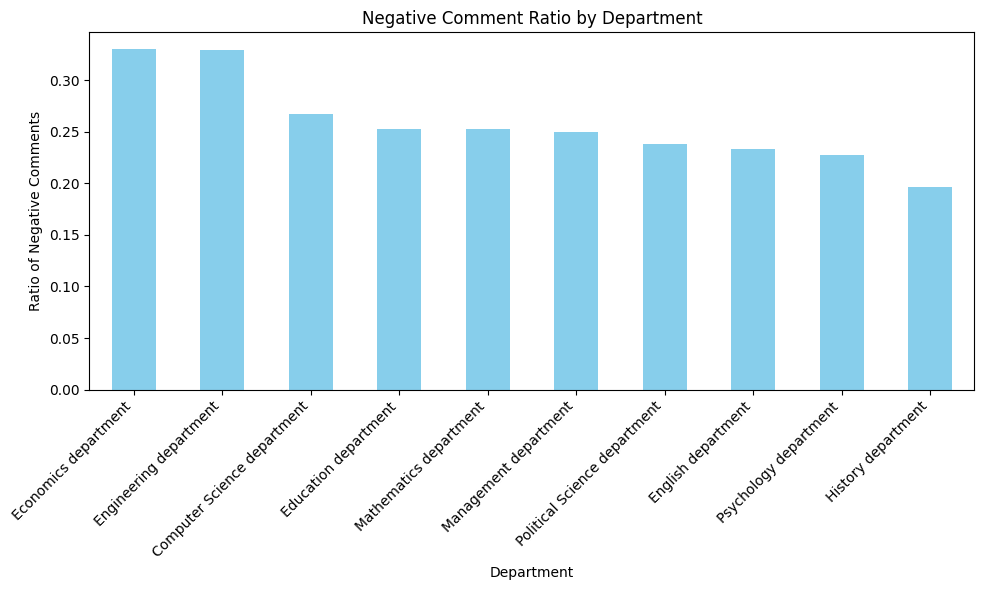

In [ ]:
# Find the top 5 departments based on the count of comments
top_departments = prof['Department'].value_counts().nlargest(10).index

# Filter the dataframe to include only rows where the 'Department' is one of the top 5 departments
prof_top_departments = prof[prof['Department'].isin(top_departments)]

# Now you can perform the same analysis as before on this filtered dataframe

# Filter the dataframe to include only rows where the sentiment_class is 'Negative'
negative_comments = prof_top_departments[prof_top_departments['sentiment_class'] == 'Negative']

# Count the number of negative comments in each department
negative_counts = negative_comments['Department'].value_counts()

# Count the total number of comments in each department
total_counts = prof_top_departments['Department'].value_counts()

# Calculate the ratio of negative to total comments
negative_ratio = negative_counts / total_counts

# Sort the departments by the negative ratio in descending order
ranking = negative_ratio.sort_values(ascending=False)

print(ranking)

# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Plotting the ranking as a bar chart
plt.figure(figsize=(10, 6))
ranking.plot(kind='bar', color='skyblue')
plt.title('Negative Comment Ratio by Department')
plt.xlabel('Department')
plt.ylabel('Ratio of Negative Comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=893dd5c2-ff0a-49e9-afe5-f4b2b61fffff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>